In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("iris.data.csv")
df.head(2)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df.describe(include='all')

,5.1,3.5,1.4,0.2,Iris-setosa
count,149.000000,149.000000,149.000000,149.000000,149
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.848322,3.051007,3.774497,1.205369,NaN
std,0.828594,0.433499,1.759651,0.761292,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
df.duplicated().sum().sum()

3

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.shape

(146, 5)

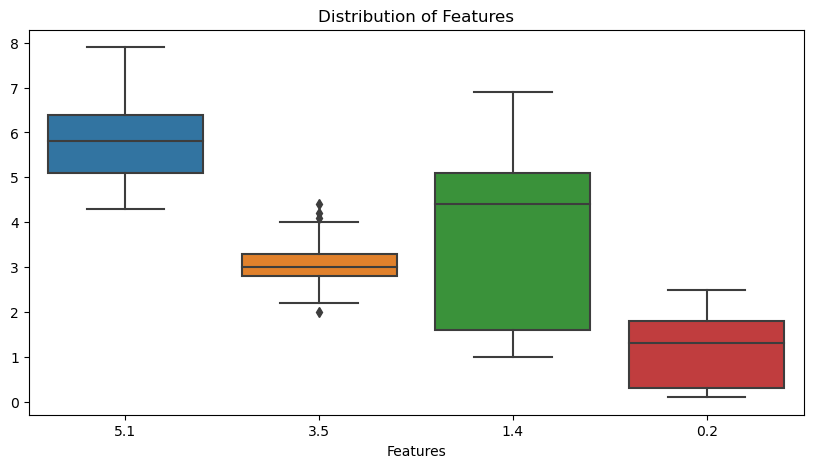

In [9]:
fig,ax= plt.subplots(figsize=(10,5))
sns.boxplot(data=df, ax=ax)
ax.set_xlabel('Features')
ax.set_title('Distribution of Features')
plt.show();

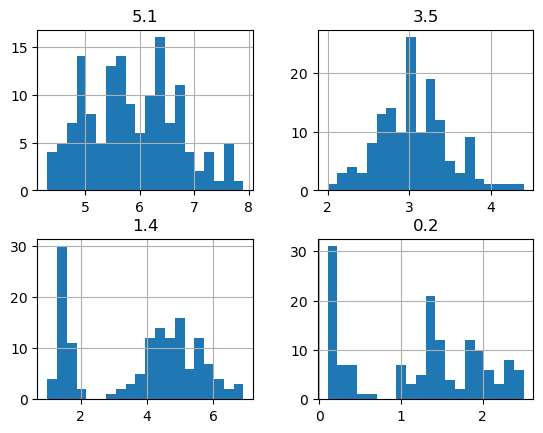

In [10]:
figsize=((10,8))
df.hist(bins =20)
plt.show();

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\honey\AppData\Local\Temp\ipykernel_26372\369215405.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


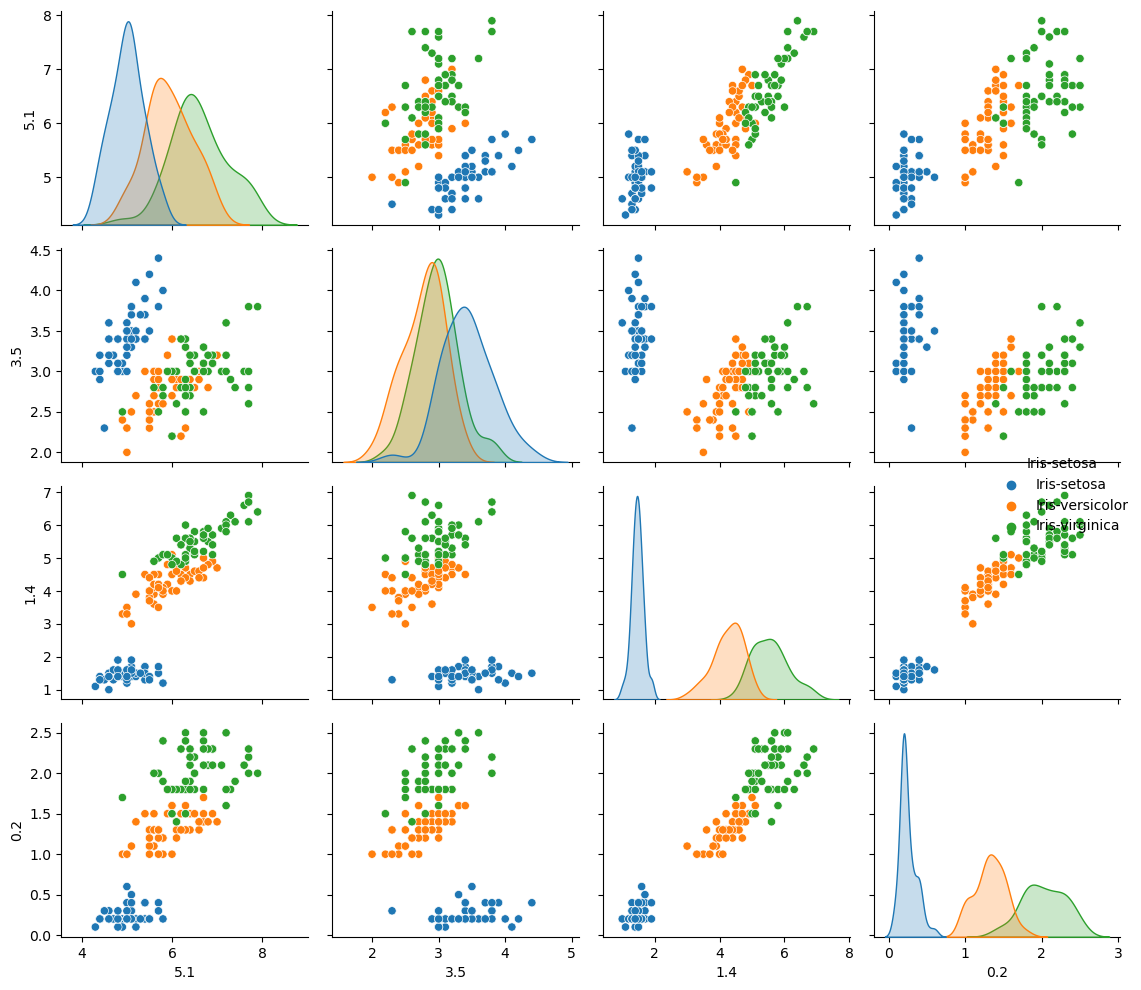

In [11]:
sns.pairplot(df, hue ='Iris-setosa')
plt.tight_layout()
plt.show();

In [12]:
df_now= df.drop('Iris-setosa', axis=1)
corr= df_now.corr()

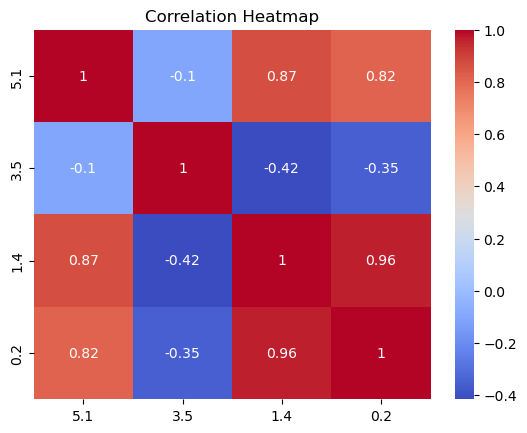

In [13]:
figsize=(8,6)
sns.heatmap(data= corr, annot= True, cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show();

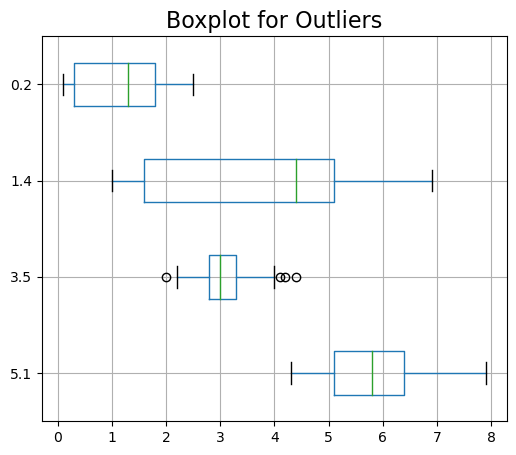

In [14]:
plt.figure(figsize=(6,5))
df.boxplot(vert=0)
plt.title('Boxplot for Outliers',fontsize=16)
plt.show();

In [15]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

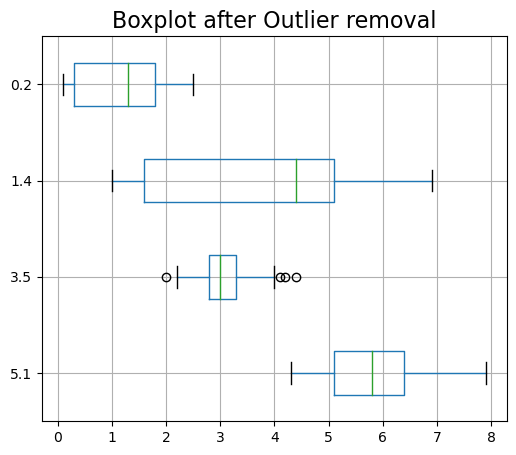

In [16]:
plt.figure(figsize=(6,5))
df.boxplot(vert=0)
plt.title('Boxplot after Outlier removal',fontsize=16)
plt.show();

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          146 non-null    float64
 1   3.5          146 non-null    float64
 2   1.4          146 non-null    float64
 3   0.2          146 non-null    float64
 4   Iris-setosa  146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


Label encoding the Iris-setosa column

In [18]:
X = df.drop(columns=['Iris-setosa'], axis=0)
y = df[['Iris-setosa']]

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 148
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5.1     146 non-null    float64
 1   3.5     146 non-null    float64
 2   1.4     146 non-null    float64
 3   0.2     146 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB


In [20]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 148
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Iris-setosa  146 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df
label_encoder = LabelEncoder()

# Apply label encoding to the 4th column ('Iris-setosa')
y['Iris-setosa'] = label_encoder.fit_transform(y['Iris-setosa'])

# Check the result
y.head()

C:\Users\honey\AppData\Local\Temp\ipykernel_26372\824791183.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Iris-setosa'] = label_encoder.fit_transform(y['Iris-setosa'])


,Iris-setosa
0,0
1,0
2,0
3,0
4,0


In [29]:
y['Iris-setosa'].unique()

array([0, 1, 2])

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

### Linear Regression

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred_lr = model.predict(X_test)

In [34]:
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

In [35]:
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Mean Squared Error: 0.04925548535269445
R-squared: 0.9286152386192834


In [38]:
print("Coefficients:" , model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-0.16062167 -0.00789494  0.2723554   0.58949182]]
Intercept: [0.23652757]


### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [92]:
log_model =LogisticRegression()

In [93]:
log_model.fit(X_train, y_train)
y_pred_logistic = log_model.predict(X_test)

C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)

Accuracy: 0.9333333333333333


In [95]:
mse_logistic = mean_squared_error(y_test,y_pred_logistic)
print("Mean Squared Error:", mse_logistic)

Mean Squared Error: 0.06666666666666667


In [97]:
r2_logistic = r2_score(y_test, y_pred_logistic)
print("R-squared:", r2_logistic)

R-squared: 0.9033816425120773


In [99]:
confusion_matrix_logistic = confusion_matrix(y_test,y_pred_logistic)
print("Confusion Matrix:\n", confusion_matrix_logistic)

Confusion Matrix:
 [[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]


In [100]:
from sklearn.metrics import classification_report 
class_report_logistic = classification_report(y_test, y_pred_logistic)
print("Classification Report:\n", class_report_logistic)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



In [129]:
import numpy as np

# Assuming `logistic_model` is your trained Logistic Regression model
coefficients = log_model.coef_[0]  # For multi-class, you might need to adjust
feature_names = X.columns  # Assuming `X` is a DataFrame with feature names

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of coefficients
importance_df['Absolute Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

print(importance_df)

  Feature  Coefficient  Absolute Coefficient
2     1.4    -2.383755              2.383755
3     0.2    -1.016823              1.016823
1     3.5     0.922823              0.922823
0     5.1    -0.415470              0.415470


### Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dtc = DecisionTreeClassifier()

In [117]:
dtc.fit(X_train, y_train)
y_pred_tree = dtc.predict(X_test)

In [118]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_tree)

Accuracy: 0.9333333333333333


In [119]:
from sklearn.metrics import confusion_matrix
cm_tree = confusion_matrix(y_test,y_pred_tree)
print("Confusion Matrix:\n", cm_tree)

Confusion Matrix:
 [[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]


In [120]:
from sklearn.metrics import classification_report 
class_report_tree = classification_report(y_test, y_pred_tree)
print("Classification Report:\n", class_report_tree)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



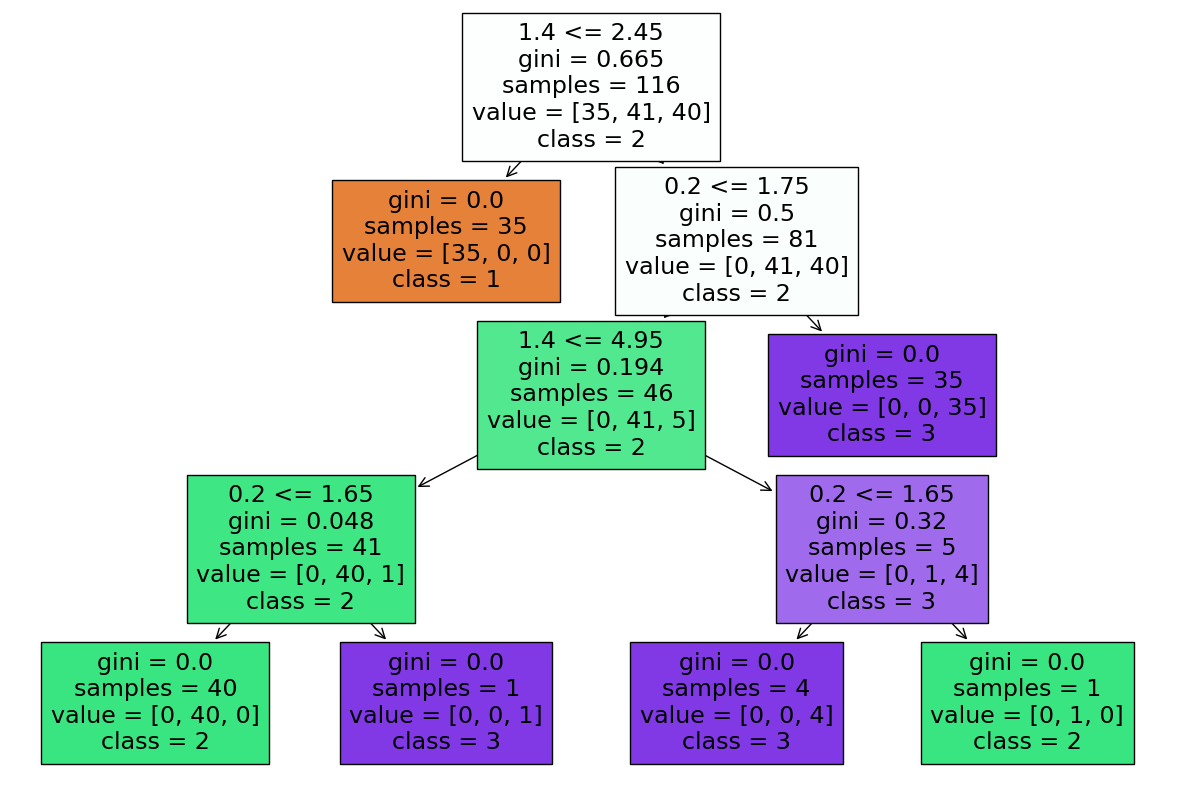

In [121]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(dtc, filled=True, feature_names=X.columns.tolist(), class_names=["1", "2", "3"])
plt.show();

In [122]:
feature_importance = pd.Series(dtc.feature_importances_, index=X.columns)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 5.1    0.000000
3.5    0.000000
1.4    0.544658
0.2    0.455342
dtype: float64


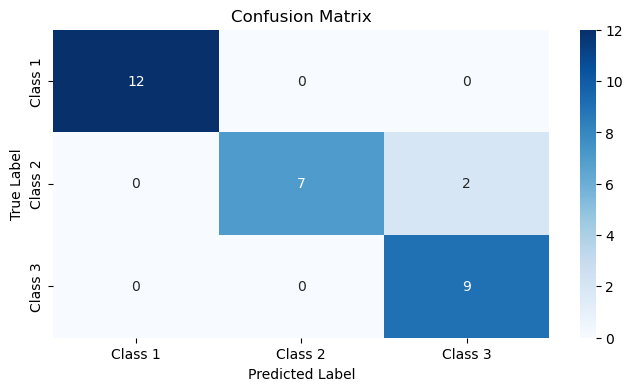

In [123]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot= True, cmap='Blues', xticklabels=["Class 1", "Class 2", "Class 3"],yticklabels=["Class 1", "Class 2", "Class 3"])
plt.xlabel('Predicted Label')
plt.ylabel("True Label")
plt.title('Confusion Matrix')
plt.show();

In [124]:
feature_importance = dtc.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 
                         'Importance': feature_importance})

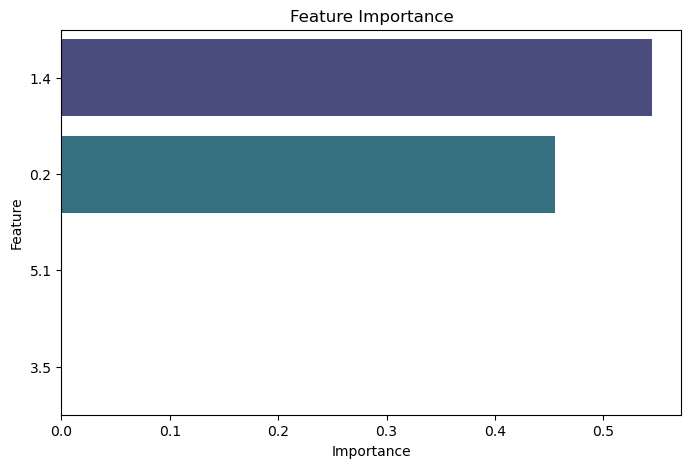

In [125]:
features = features.sort_values(by='Importance', ascending =False)
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data = features, palette= "viridis")
plt.title('Feature Importance')
plt.show();

In [127]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For Logistic Regression
y_pred_logistic = log_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

# For Decision Tree
y_pred_tree = dtc.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logistic)
print("Logistic Regression Classification Report:\n", class_report_logistic)

print("Decision Tree Accuracy:", accuracy_tree)
print("Decision Tree Confusion Matrix:\n", cm_tree)
print("Decision Tree Classification Report:\n", class_report_tree)

Logistic Regression Accuracy: 0.9333333333333333
Logistic Regression Confusion Matrix:
 [[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30

Decision Tree Accuracy: 0.9333333333333333
Decision Tree Confusion Matrix:
 [[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94    

#### KNN Model

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [142]:
y_pred_knn = knn.predict(X_test)

In [143]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn= classification_report(y_test, y_pred_knn)

In [144]:
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("K-Nearest Neighbors Confusion Matrix:")
print(conf_matrix_knn)
print("K-Nearest Neighbors Classification Report:")
print(class_report_knn)

K-Nearest Neighbors Accuracy: 0.9333333333333333
K-Nearest Neighbors Confusion Matrix:
[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



#### Support Vector Machine

In [145]:
from sklearn.svm import SVC

In [146]:
svm = SVC(kernel ='linear')
svm.fit(X_train, y_train)

C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [147]:
y_pred_svm = svm.predict(X_test) 

In [148]:
accuracy_svm= accuracy_score(y_test, y_pred_svm)
conf_matrix_svm= confusion_matrix(y_test, y_pred_svm)
class_report_svm= classification_report(y_test, y_pred_svm) 

In [150]:
print("Support Vector Machine Accuracy:", accuracy_svm)
print("Confusion Matrix")
print(conf_matrix_svm)
print("Support Vector Machine Classification Report:")
print(class_report_svm)

Support Vector Machine Accuracy: 0.9333333333333333
Confusion Matrix
[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



#### Random Forest Classifier 

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
rf =RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [154]:
y_pred_rf = rf.predict(X_test)

In [155]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [159]:
print("Accuracy for Random Forest Classifier:",accuracy_rf)
print("Confusion matrix for Random Forest Classifier:")
print(conf_matrix_rf)
print("Classification Report for Random Forest Classifier")
print(class_report_rf)

Accuracy for Random Forest Classifier: 0.9333333333333333
Confusion matrix for Random Forest Classifier:
[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



#### Gradient Boosting Machines

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Parameters can be tuned
gbm.fit(X_train, y_train)

C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [163]:
y_pred_gbm = gbm.predict(X_test)

In [164]:
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)

print("Gradient Boosting Machines Accuracy:", accuracy_gbm)
print("Gradient Boosting Machines Confusion Matrix:")
print(conf_matrix_gbm)
print("Gradient Boosting Machines Classification Report:")
print(class_report_gbm)

Gradient Boosting Machines Accuracy: 0.9333333333333333
Gradient Boosting Machines Confusion Matrix:
[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
Gradient Boosting Machines Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



#### Insights:
#### Accuracy Consistency: All models, Logistic Regression, Decision Tree, SVM, Gradient Boosting achieved the same accuracy 0.93 This indicates that these models performed the same in terms of overall prediction. 
#### Confusion Matrix: All models show the same values. Class 0 was perfectly classified by all models, while Class 1 had 2 misclassifications into Class 2, and Class 2 had no misclassifications.

#### Precision, Recall, and F1-Score:

#### Class 0: All models achieved perfect precision, recall, and F1-score.
#### Class 1: All models had high precision but lower recall, suggesting that while they are good at identifying Class 1 when it appears, they sometimes miss it.
#### Class 2: Precision was lower, but recall was perfect, indicating that Class 2 was correctly identified whenever it appeared, but with some misclassifications in predictions.

##### End